# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

In [1]:
# Bagian ini dapat diabaikan apabila library telah diinstall
!python -m pip install pandas matplotlib seaborn numpy sklearn imblearn


[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Letakkan pustaka di sini.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

SEED = 42

In [3]:
# Baca data di sini.
df = pd.read_csv(r'weatherAUS.csv')

# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

1. Ukuran dari data (instansi dan fitur)

In [4]:
# I.1.1 Ukuran Instances dan Attributes
pd.DataFrame({
    'Instance': [df.shape[0]],
    'Attribute': [df.shape[1]],
}, index=["Amount"]).T

,Amount
Instance,145460
Attribute,23


2. Tipe dari setiap fitur 

In [5]:
# create dataframe for each attribute data types with one example from data
pd.DataFrame({
    'Type': df.dtypes,
    'Example': df.sample(1, random_state=SEED).values[0]
})

,Type,Example
Date,object,2012-04-22
Location,object,MountGambier
MinTemp,float64,15.0
MaxTemp,float64,18.9
Rainfall,float64,4.2
Evaporation,float64,6.6
Sunshine,float64,8.0
WindGustDir,object,NNW
WindGustSpeed,float64,54.0
WindDir9am,object,NNW


In [6]:
# Convert object datatype to category to minimize memory overhead
df = df.astype({
    'Location': 'category',
    'WindGustDir': 'category',
    'WindDir9am': 'category',
    'WindDir3pm': 'category',
    'RainToday': 'category',
    'RainTomorrow': 'category',
})


3. Banyak nilai unik dari fitur yang bertipe kategorikal

In [7]:
# Unique value amount for category columns
pd.DataFrame({
    'Unique Value': df.select_dtypes('category').nunique()
})

,Unique Value
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [8]:
# Get min, max, mean, median, and std for numerical columns
pd.DataFrame({
    'Min': df.select_dtypes('number').min(),
    'Max': df.select_dtypes('number').max(),
    'Mean': df.select_dtypes('number').mean(),
    'Median': df.select_dtypes('number').median(),
    'Std': df.select_dtypes('number').std(),
})

,Min,Max,Mean,Median,Std
MinTemp,-8.5,33.9,12.194034,12.0,6.398495
MaxTemp,-4.8,48.1,23.221348,22.6,7.119049
Rainfall,0.0,371.0,2.360918,0.0,8.478060
Evaporation,0.0,145.0,5.468232,4.8,4.193704
Sunshine,0.0,14.5,7.611178,8.4,3.785483
WindGustSpeed,6.0,135.0,40.035230,39.0,13.607062
WindSpeed9am,0.0,130.0,14.043426,13.0,8.915375
WindSpeed3pm,0.0,87.0,18.662657,19.0,8.809800
Humidity9am,0.0,100.0,68.880831,70.0,19.029164
Humidity3pm,0.0,100.0,51.539116,52.0,20.795902


## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

1. Nilai hilang (_missing_) dari setiap fitur 

    Sorted descending based on Missing Percentage respective to the total number of instances

In [9]:
pd.DataFrame({
    'Missing Value': df.isna().sum(),
    'Missing (%)' : np.round(df.isna().sum() / df.shape[0] * 100, 1)
}).sort_values(by='Missing Value', ascending=False)

,Missing Value,Missing (%)
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


2. Nilai pencilan (_outlier_) dari setiap fitur

    Using Interquartile Range (IQR) method

In [10]:
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# Get IQR for numerical columns
col_iqr = pd.DataFrame({
    'IQR': df.select_dtypes('number').apply(iqr)
})

# Get outlier threshold for numerical columns
col_iqr['Bottom Threshold'] = df.select_dtypes('number').quantile(0.25) - (1.5 * col_iqr['IQR'])
col_iqr['Top Threshold'] = df.select_dtypes('number').quantile(0.75) + (1.5 * col_iqr['IQR'])

# Get outlier amount for numerical columns
col_iqr['Outlier Amount'] = df.select_dtypes('number').apply(lambda x: x[(x < col_iqr.loc[x.name, 'Bottom Threshold']) | (x > col_iqr.loc[x.name, 'Top Threshold'])].count())
col_iqr['Outlier (%)'] = np.round(col_iqr['Outlier Amount'] / df.shape[0] * 100, 1)

col_iqr.sort_values(by='Outlier Amount', ascending=False)

,IQR,Bottom Threshold,Top Threshold,Outlier Amount,Outlier (%)
Rainfall,0.8,-1.20,2.00,25578,17.6
WindGustSpeed,17.0,5.50,73.50,3092,2.1
WindSpeed3pm,11.0,-3.50,40.50,2523,1.7
Evaporation,4.8,-4.60,14.60,1995,1.4
WindSpeed9am,12.0,-11.00,37.00,1817,1.2
Humidity9am,26.0,18.00,122.00,1425,1.0
Pressure9am,9.5,998.65,1036.65,1191,0.8
Pressure3pm,9.6,996.00,1034.40,919,0.6
Temp3pm,9.8,1.90,41.10,764,0.5
MaxTemp,10.3,2.45,43.65,489,0.3


Outliers Plotting (with Boxplot) for each numerical feature

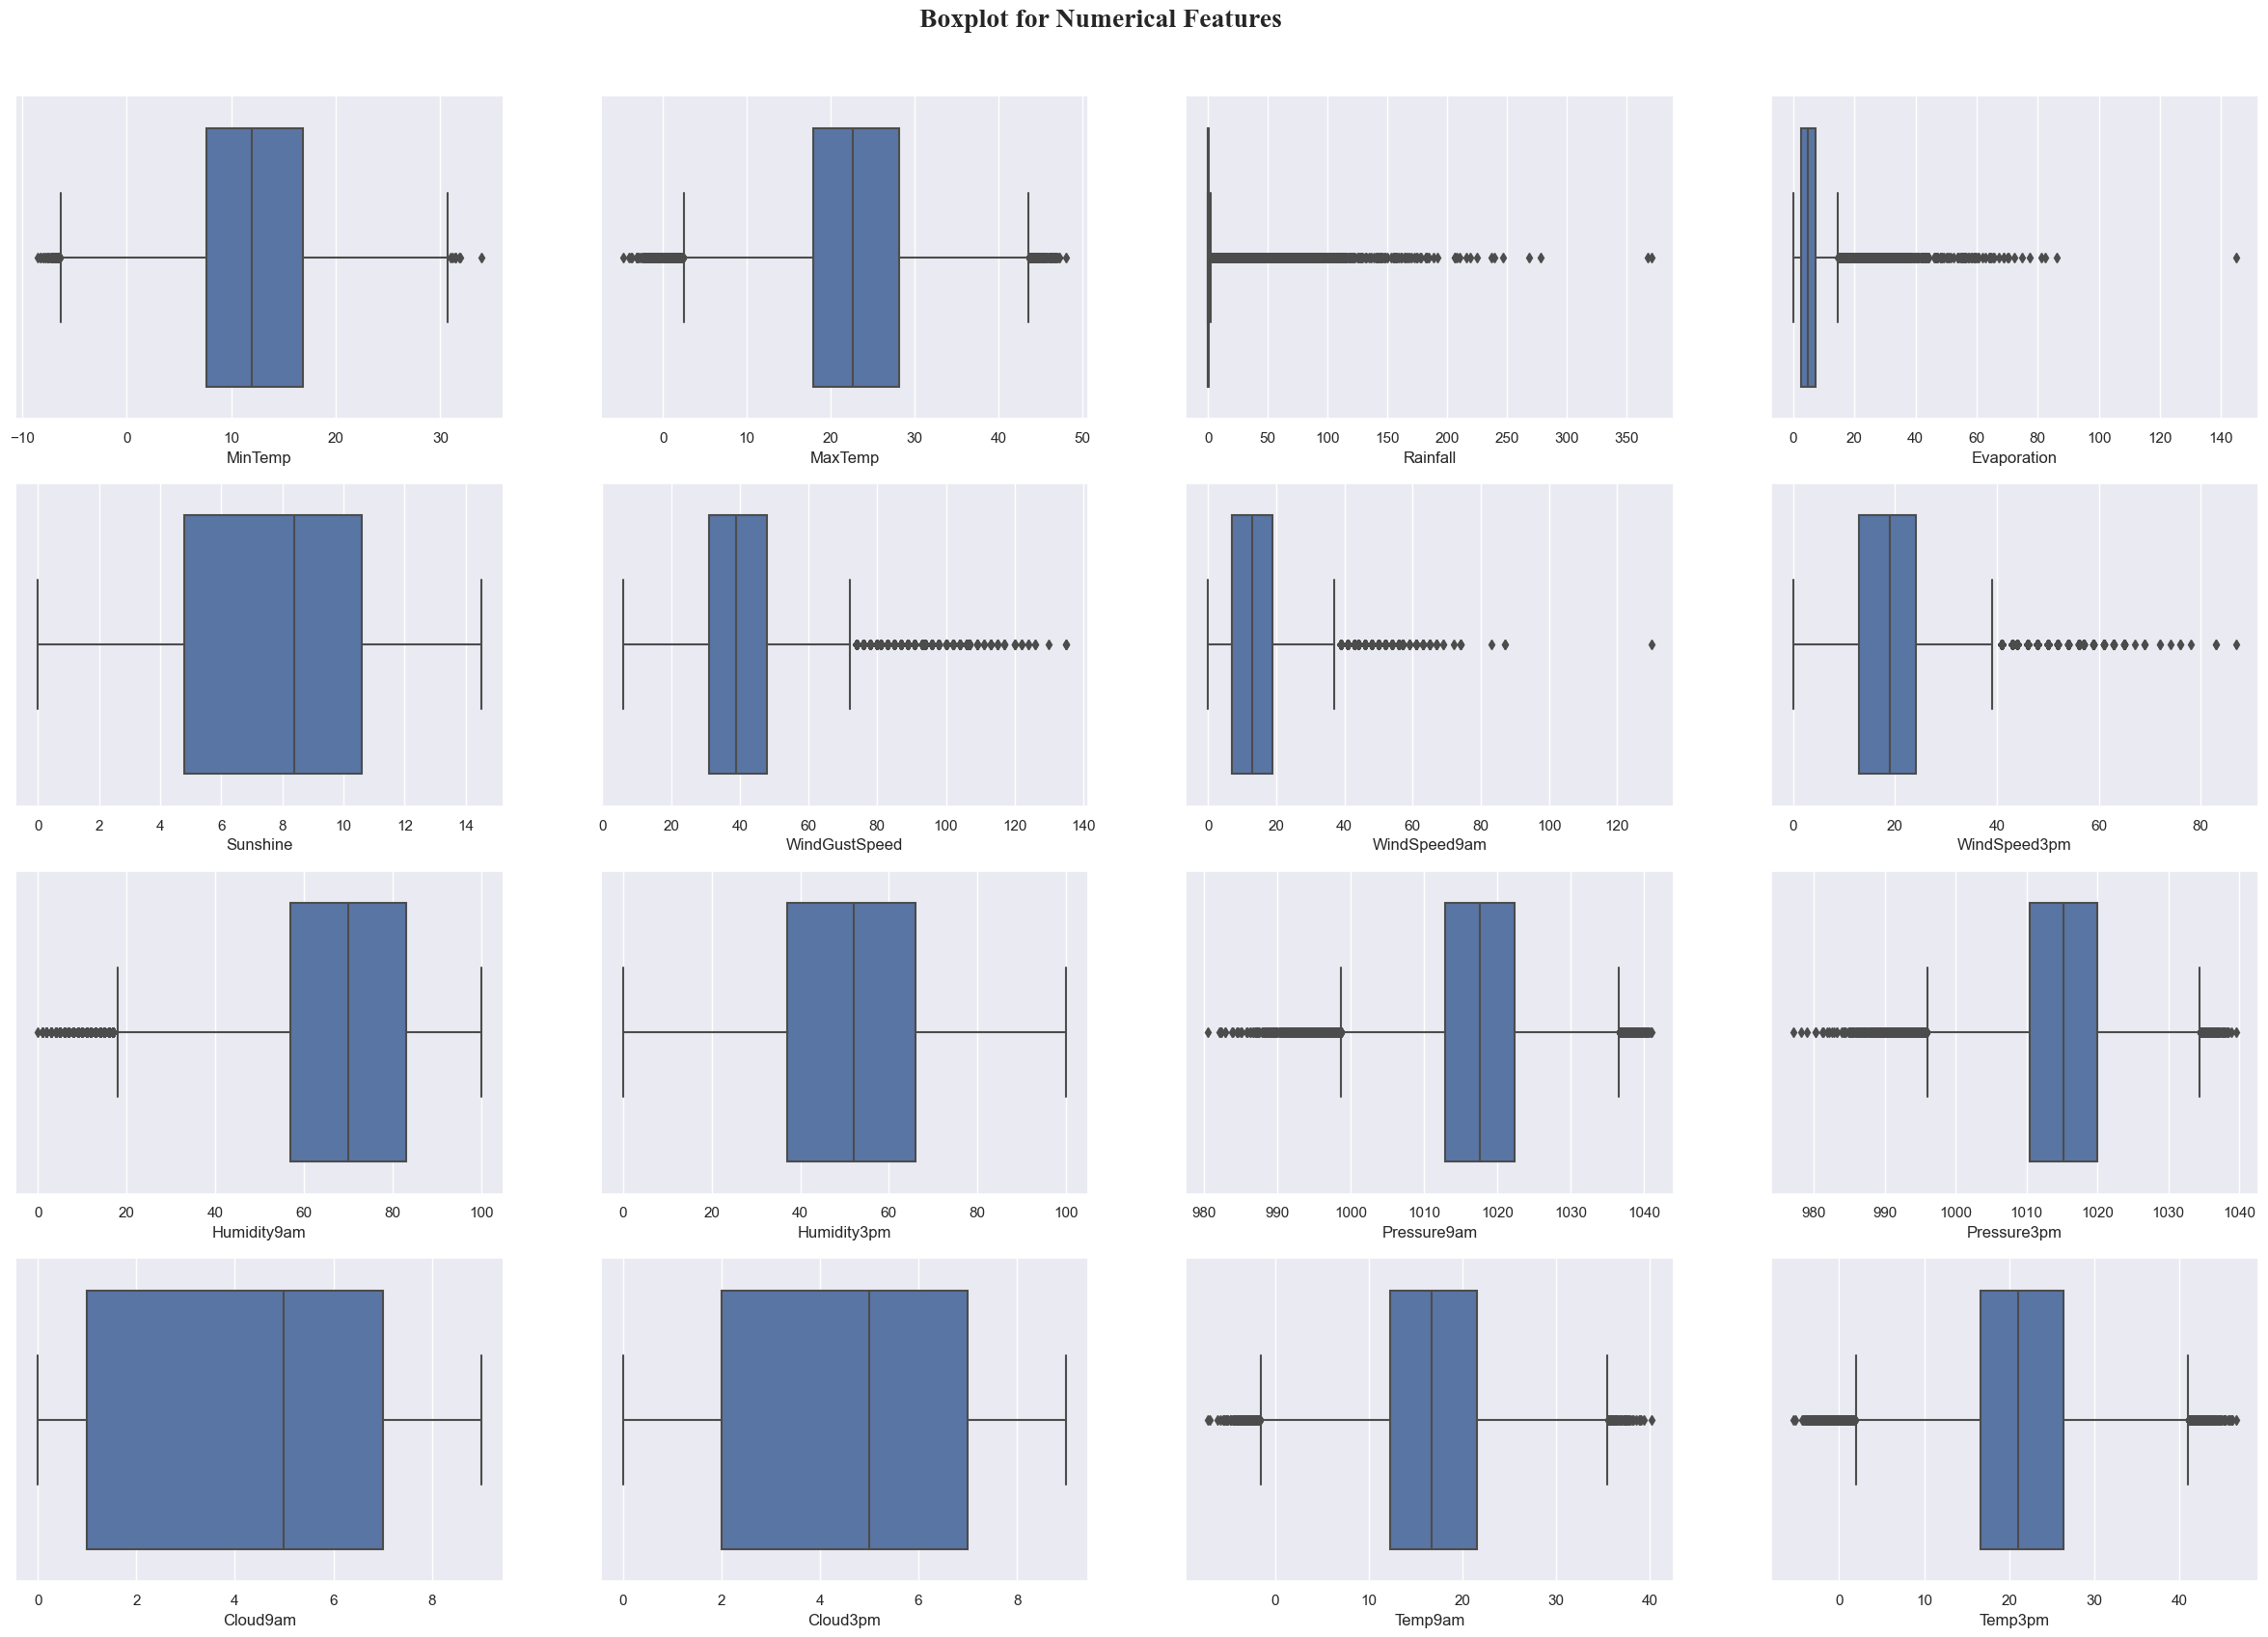

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, col in enumerate(df.select_dtypes('number').columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 4, i % 4], orient='h')

fig.suptitle('Boxplot for Numerical Features', fontsize=20, fontweight='bold', fontname='Times New Roman', y=0.925)
plt.show()

## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

1. Pencarian korelasi antarfitur

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17656\3856926585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')


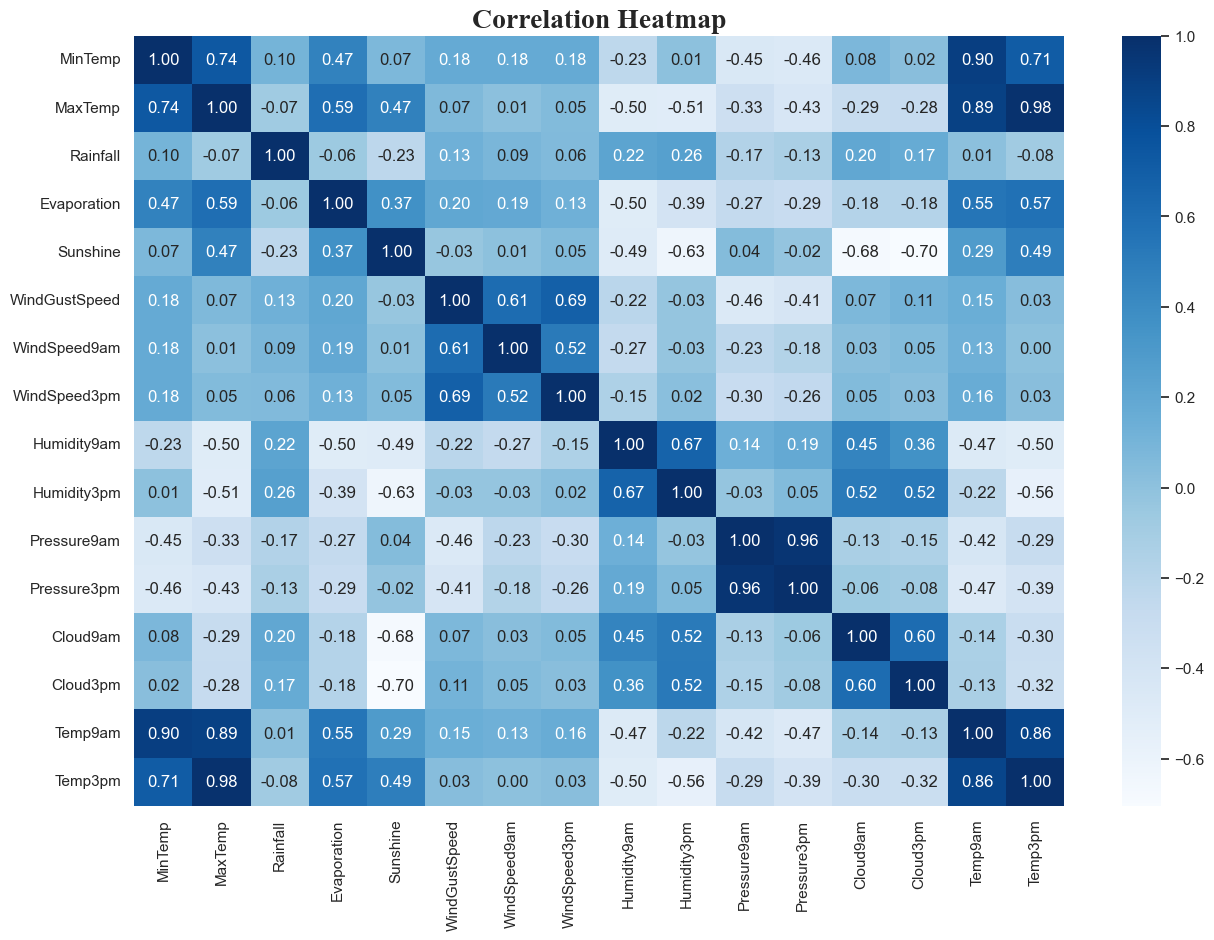

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.show()

2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)

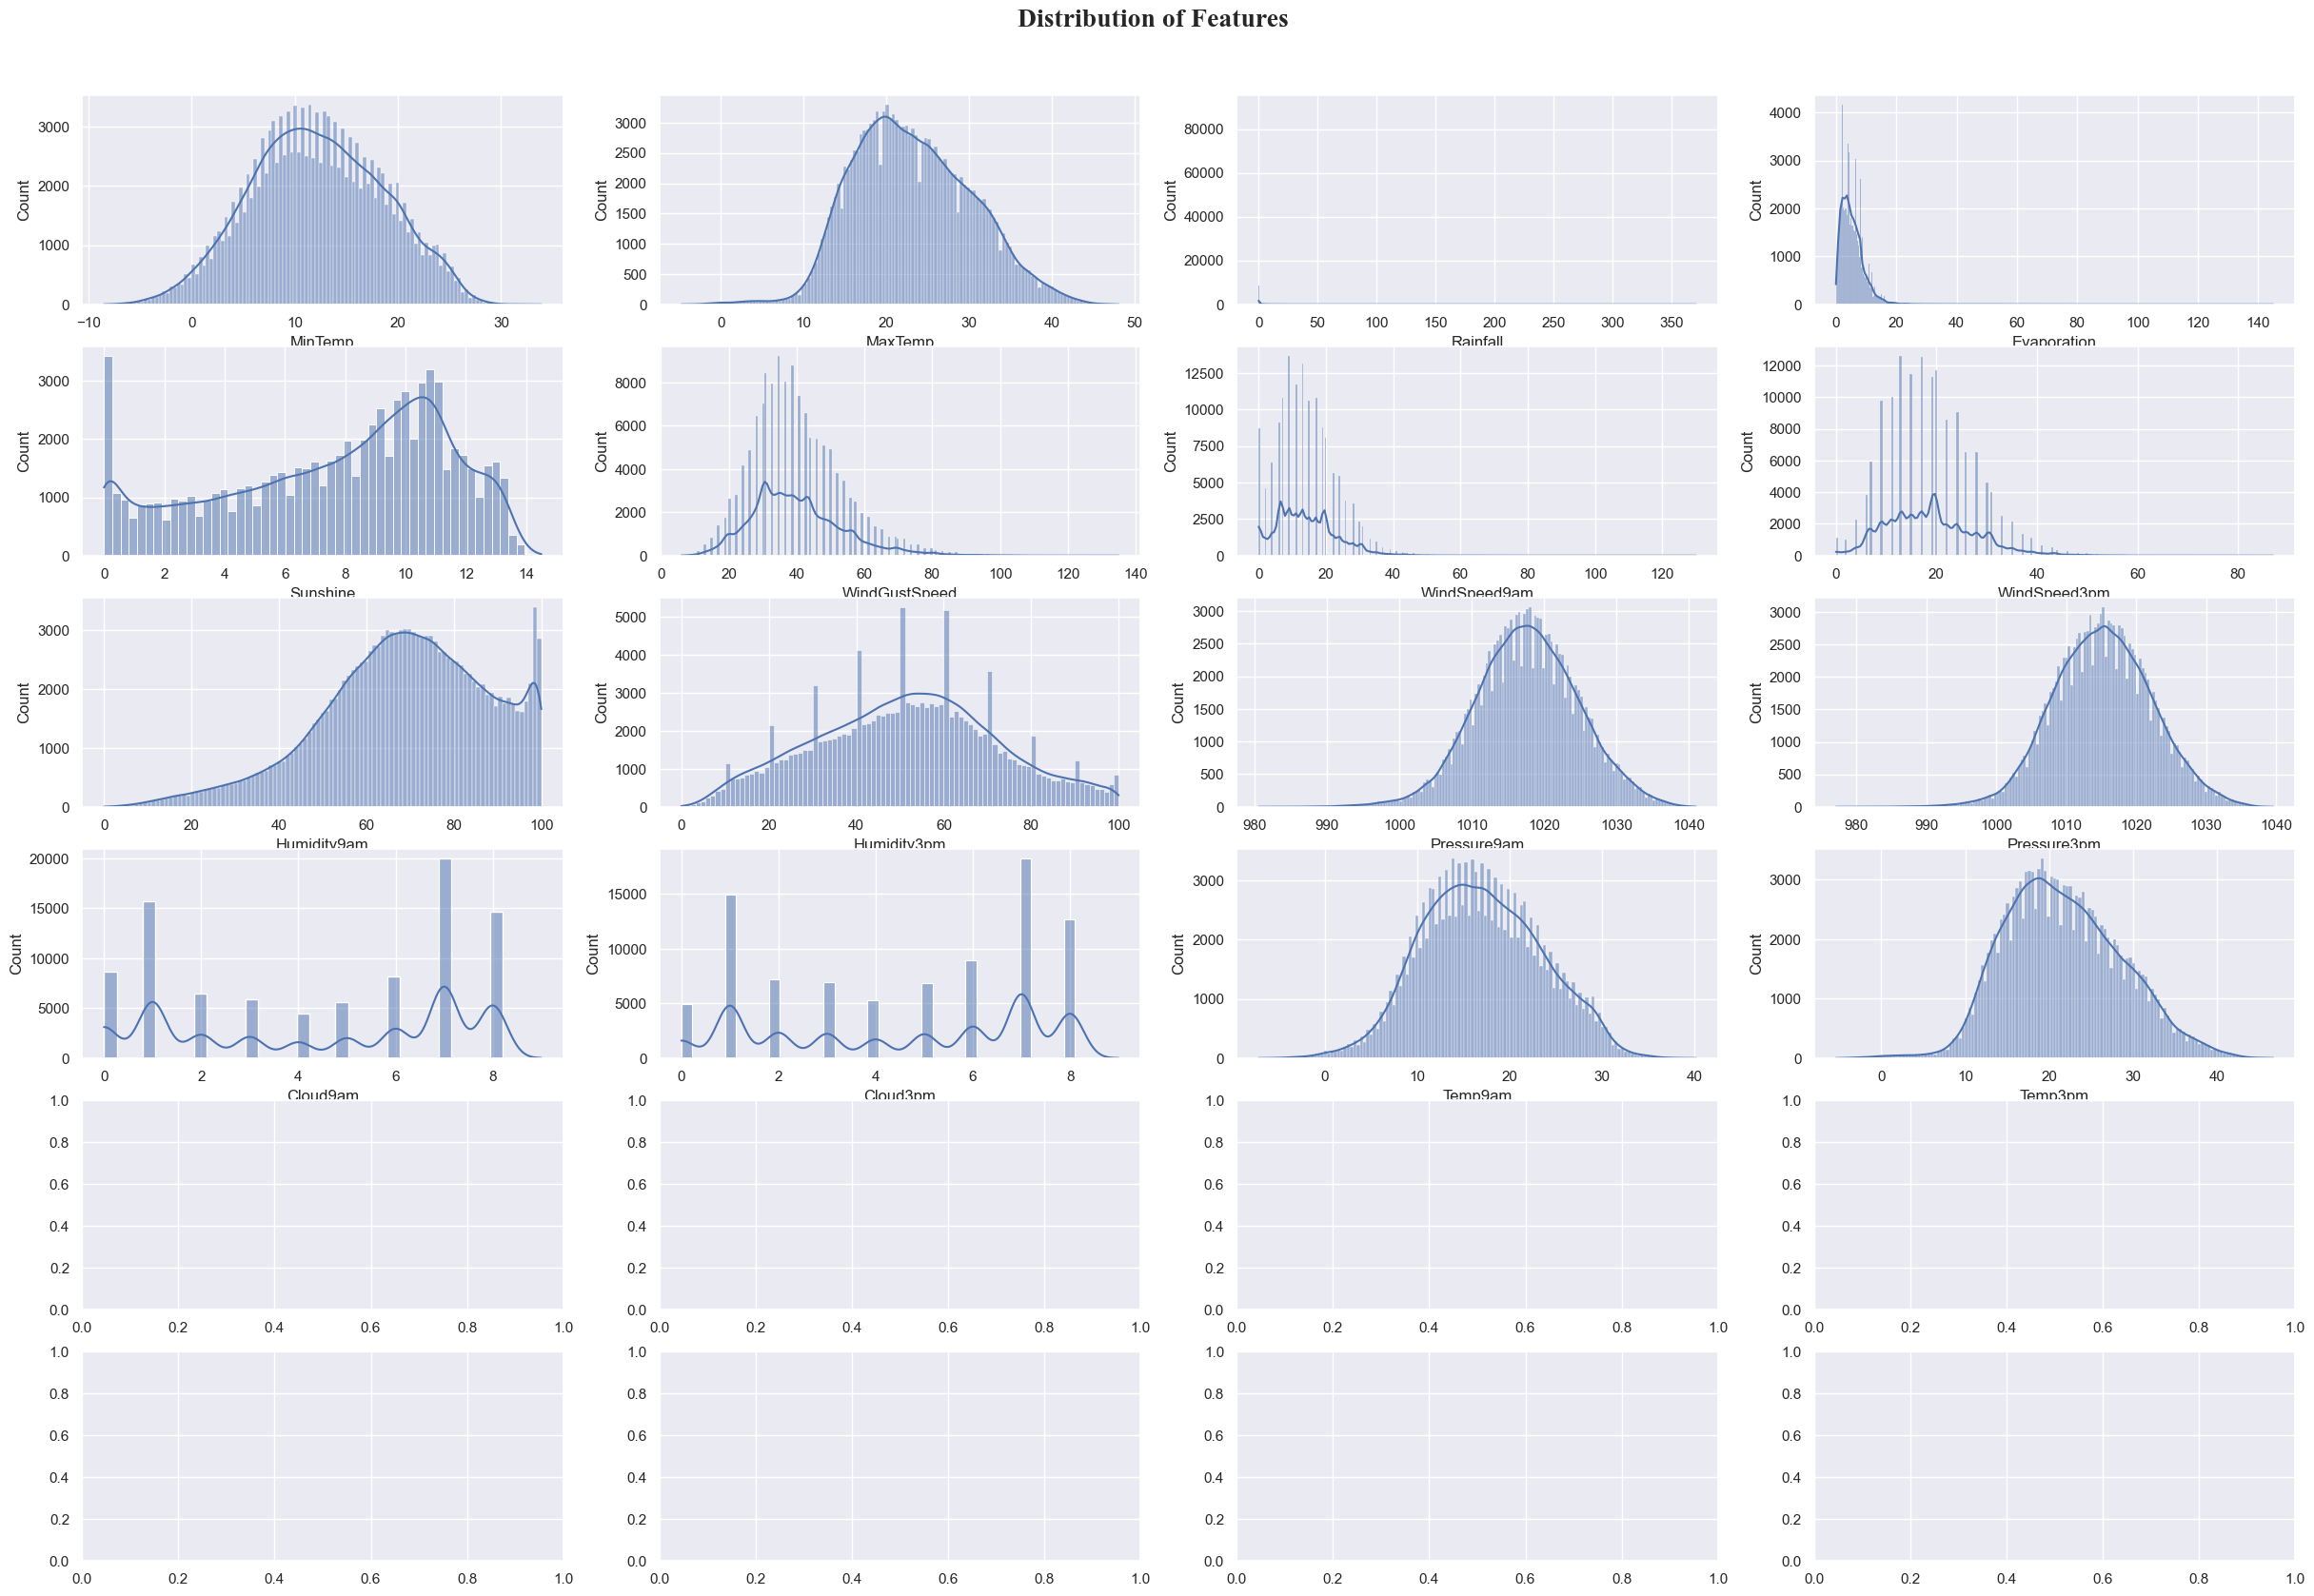

In [13]:
# visualize distribution of every feature using 4x4 figure
fig, axes = plt.subplots(6, 4, figsize=(30, 20))
for i, col in enumerate(df.select_dtypes('number').columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4], kde=True)

fig.suptitle('Distribution of Features', fontsize=20, fontweight='bold', fontname='Times New Roman', y=0.925)
plt.show()

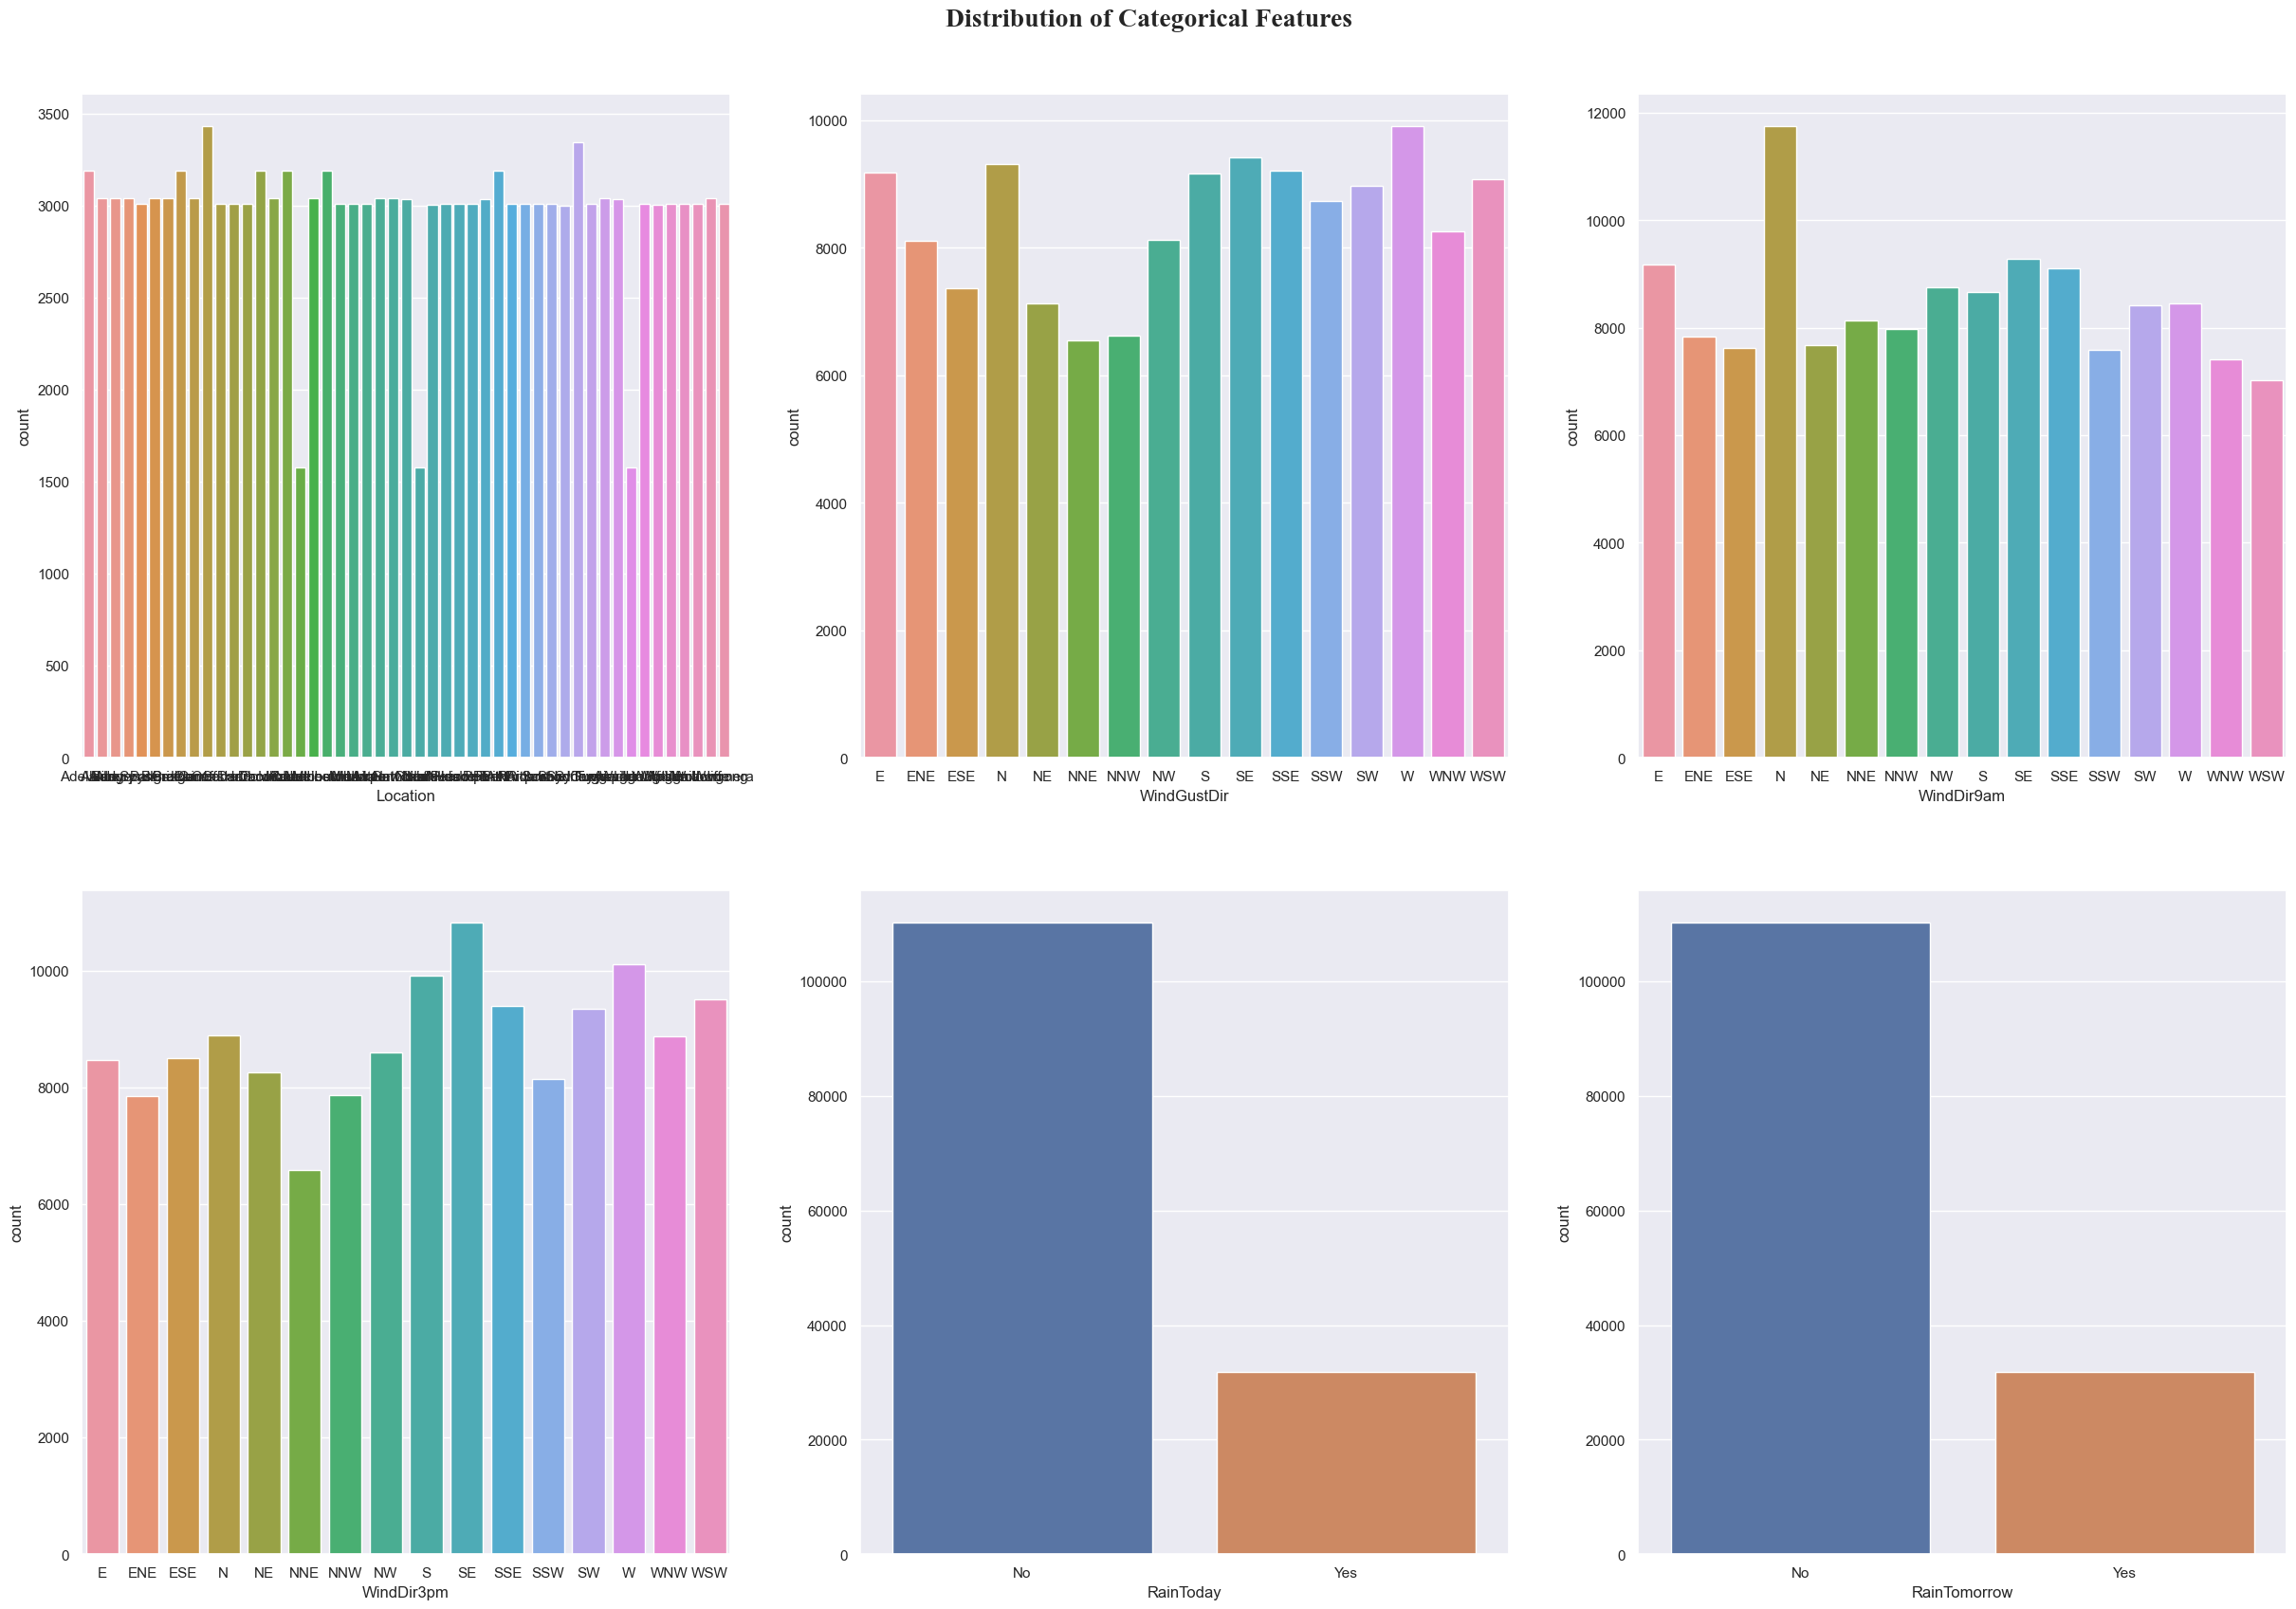

In [14]:
# visualize distribution categorical in 2 x 3 figure using countplot
fig, axes = plt.subplots(2, 3, figsize=(30, 20))
for i, col in enumerate(df.select_dtypes('category').columns):
    sns.countplot(data=df, x=col, ax=axes[i // 3, i % 3])

fig.suptitle('Distribution of Categorical Features', fontsize=20, fontweight='bold', fontname='Times New Roman', y=0.925)
plt.show()

3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

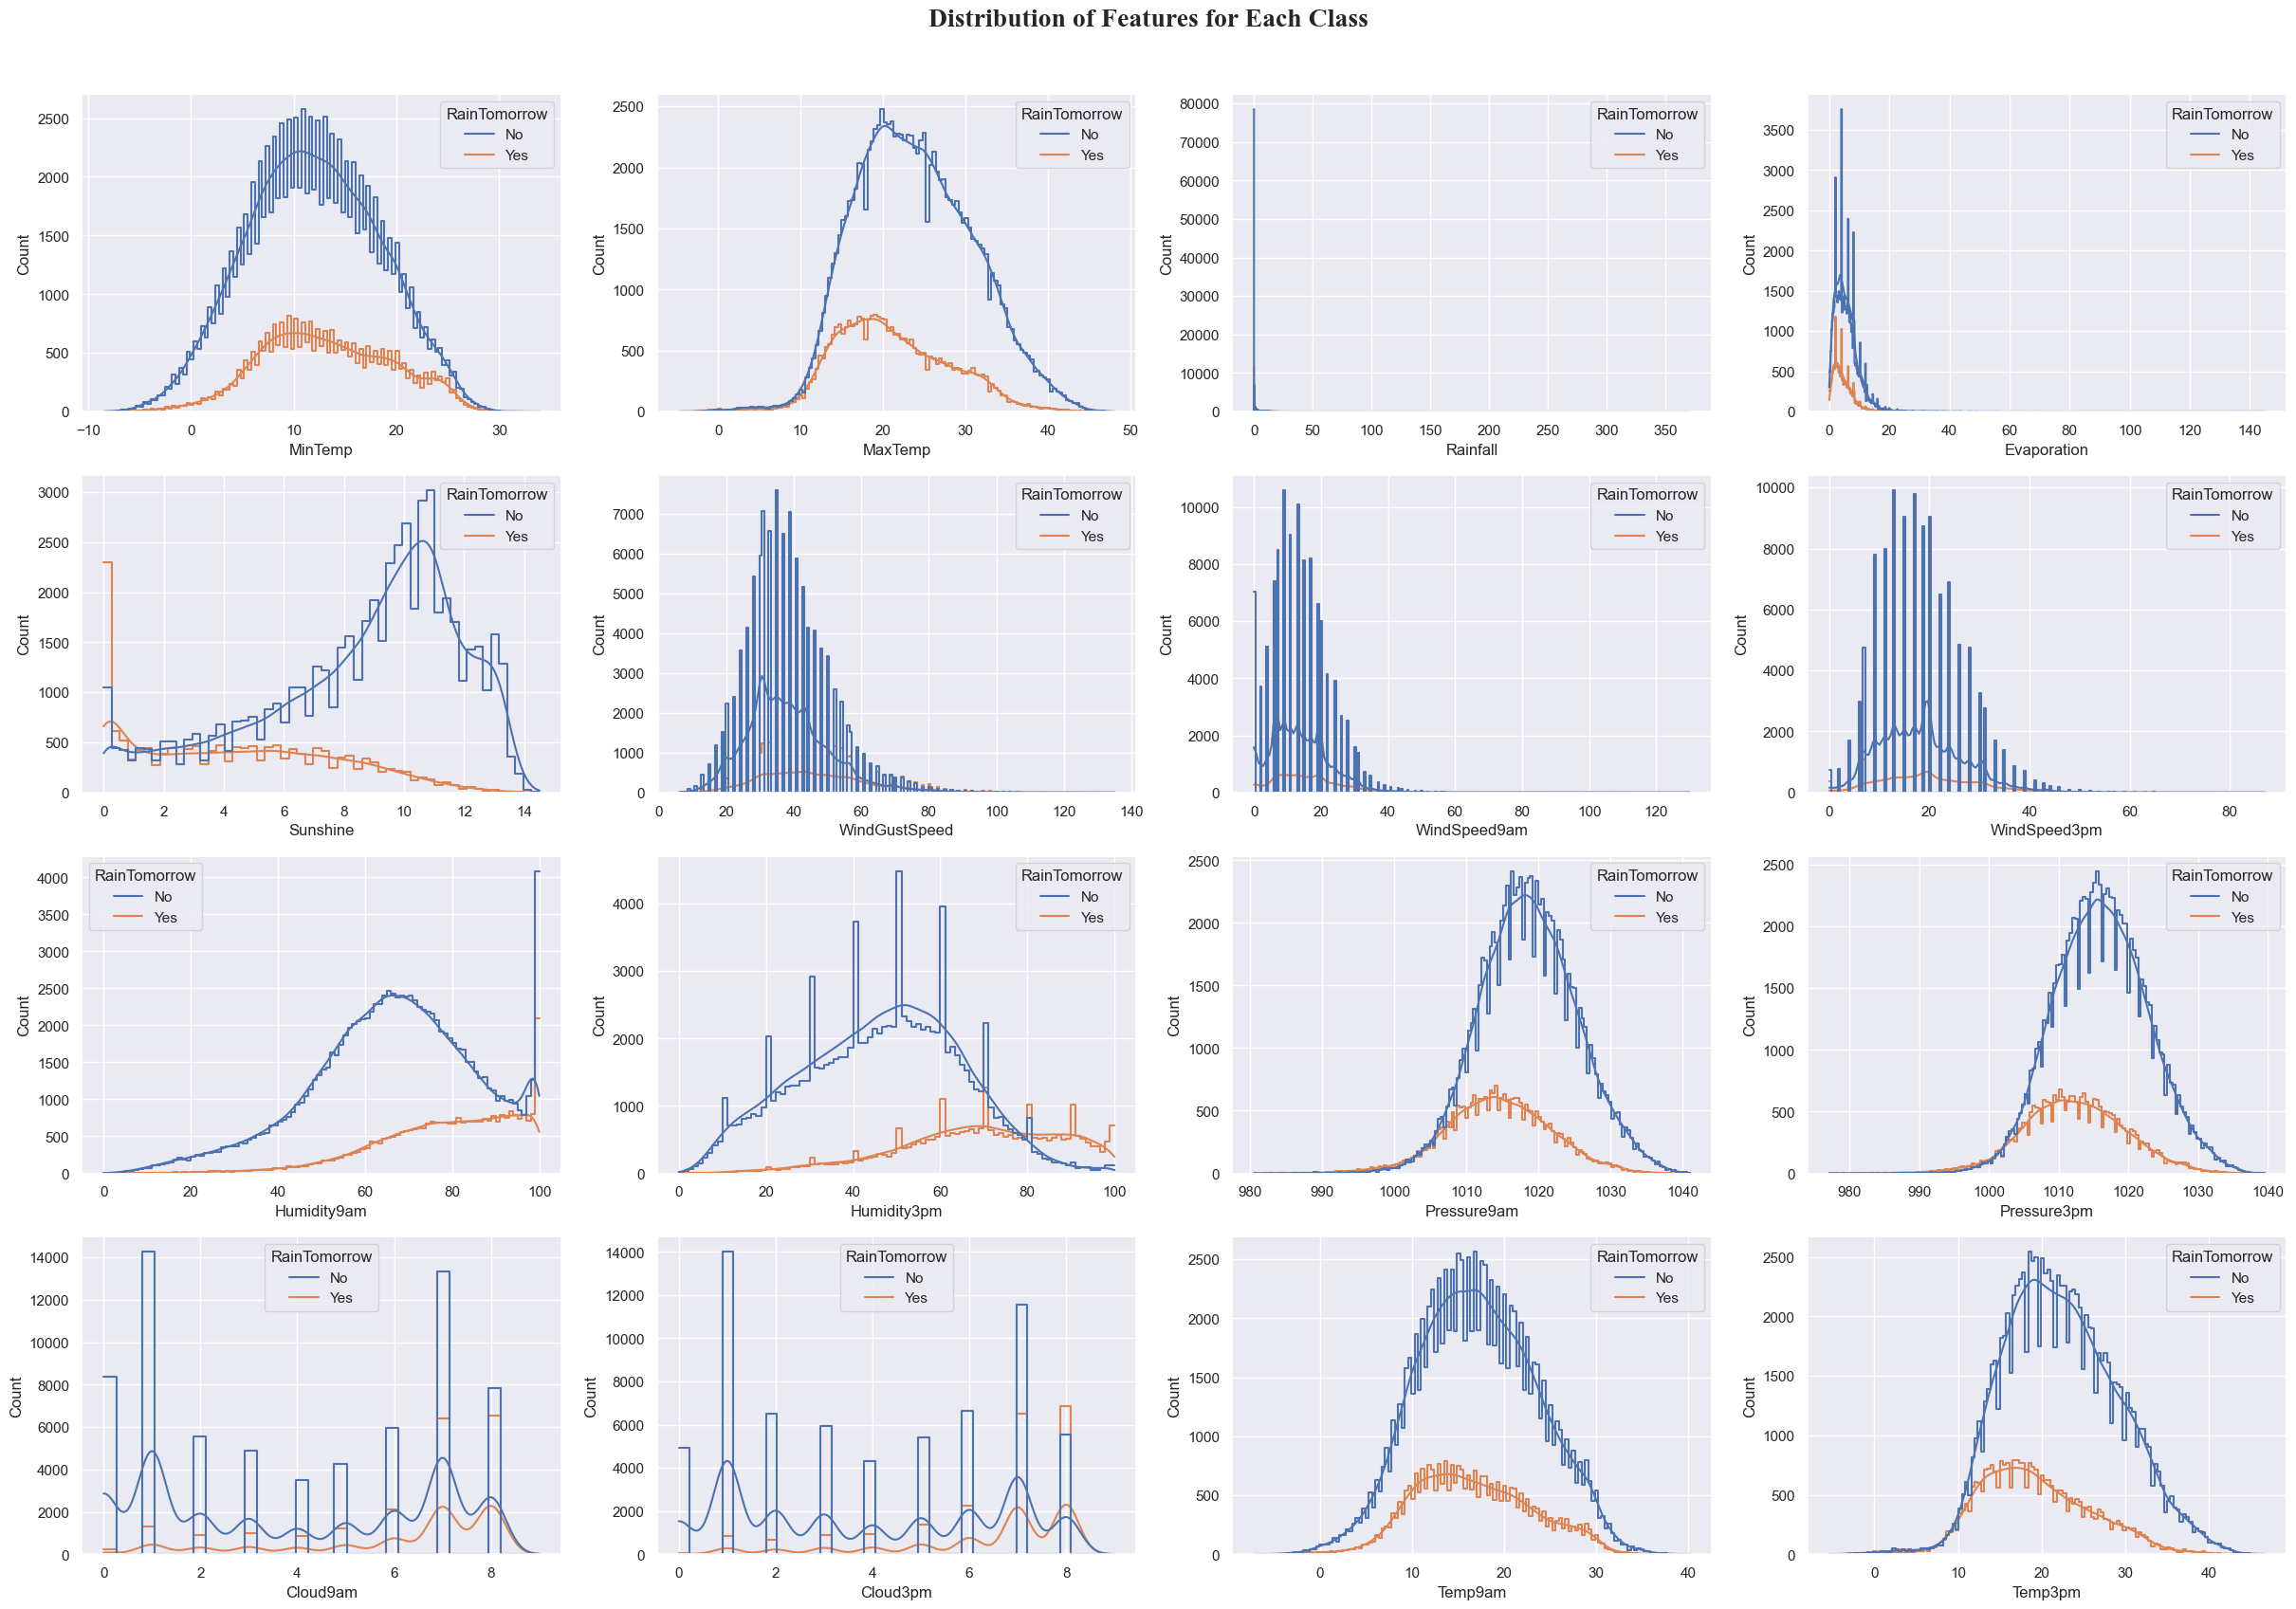

In [15]:
# visualize feature distribution for each class
fig, axes = plt.subplots(4, 4, figsize=(30, 20))
for i, col in enumerate(df.select_dtypes('number').columns):
    sns.histplot(data=df, x=col, hue='RainTomorrow', ax=axes[i // 4, i % 4], kde=True, fill=False, element='step')

fig.suptitle('Distribution of Features for Each Class', fontsize=20, fontweight='bold', fontname='Times New Roman', y=0.925)
plt.show()

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

In [16]:
# count instances that contains missing categorical value
df[df.select_dtypes('category').columns].isna().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

2. Pembuangan fitur yang menurut kalian tidak dibutuhkan

    - Drop Date karena tidak dibutuhkan
    - Drop Sunshine, Evaporation, Cloud3pm, Cloud9am karena memiliki nilai hilang yang sangat banyak
    - Drop Instance dengan Missing Categorical Value karena tidak memiliki basis untuk mengisi missing value pada categorical feature
    - Drop Rainfall karena nilai outlier yang sangat banyak

In [17]:
df_drop = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Rainfall'])
df_drop = df_drop.dropna(subset=df_drop.select_dtypes('category').columns)

df_drop.shape

(123710, 17)

3. Penanganan nilai hilang

    Impute missing data dengan Mean, karena outlier pada feature missing cenderung sedikit sehingga tidak memengaruhi komputasi mean secara signifikan

In [18]:
# impute missing data with mean
df_drop_impute = df_drop.fillna(df_drop.mean())
df_drop_impute.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17656\2447184331.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_drop_impute = df_drop.fillna(df_drop.mean())


Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
df_drop_impute.shape

(123710, 17)

4. Transformasi data kategorikal menjadi numerikal (_encoding_)
    - Transformasi Location secara OrdinalEncoding
    - Transformasi WindGustDir, WindDir9am, WindDir3pm secara OneHotEncoding

In [20]:
# import OrdinalEncoder to encode categorical data
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# encode Location, raintoday, raintomorrow with ordinal encoder
ordinal_encoder = OrdinalEncoder()
df_encoded = pd.concat([
    df_drop_impute.drop(columns=['Location', 'RainToday', 'RainTomorrow']).reset_index(drop = True),
    pd.DataFrame(ordinal_encoder.fit_transform(df_drop_impute[['Location', 'RainToday', 'RainTomorrow']]), columns=['Location', 'RainToday', 'RainTomorrow']).reset_index(drop = True)
], axis=1)

# encode WindGustDir, WindDir9am, WindDir3pm, RainToday, and RainTomorrow with one hot encoder
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
df_encoded = pd.concat([
    df_encoded.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm']).reset_index(drop = True),
    pd.DataFrame(one_hot_encoder.fit_transform(df_encoded[['WindGustDir', 'WindDir9am', 'WindDir3pm']]), columns=one_hot_encoder.get_feature_names_out(['WindGustDir', 'WindDir9am', 'WindDir3pm'])).reset_index(drop = True)
], axis=1)

df_encoded.shape

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(123710, 59)

# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

- F1-Score
- Confusion Matrix, beserta dengan komputasi precision recall

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [21]:
from sklearn.model_selection import train_test_split

RD_STATE = 0
X = df_encoded.loc[:, df_encoded.columns!='RainTomorrow']
Y = df_encoded['RainTomorrow']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RD_STATE)


In [22]:
X_train

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
22840,2.3,14.2,50.0,6.0,20.0,81.0,44.0,1016.300000,1012.600000,6.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43617,7.1,16.1,31.0,15.0,15.0,97.0,72.0,1017.398144,1015.011596,9.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24043,10.9,19.9,44.0,9.0,24.0,54.0,29.0,1013.600000,1012.200000,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
109985,5.9,12.3,37.0,13.0,15.0,84.0,73.0,1022.500000,1021.700000,7.6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36124,17.8,23.3,31.0,9.0,15.0,78.0,77.0,1025.700000,1022.600000,19.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,3.8,22.8,43.0,7.0,15.0,98.0,37.0,1022.500000,1020.700000,11.7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117952,25.3,32.4,31.0,15.0,6.0,90.0,90.0,1009.800000,1006.300000,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42613,7.8,19.2,37.0,15.0,7.0,98.0,60.0,1017.398144,1015.011596,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43567,1.4,12.9,33.0,11.0,7.0,94.0,73.0,1017.398144,1015.011596,5.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_test

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
21279,17.0,32.3,30.0,9.0,11.0,75.000000,39.0,1022.000000,1016.500000,22.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116352,3.5,19.1,33.0,2.0,9.0,45.000000,21.0,1023.800000,1020.100000,10.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31710,6.2,22.0,50.0,31.0,28.0,48.000000,32.0,1018.300000,1013.800000,14.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69850,7.5,22.9,30.0,6.0,15.0,60.000000,45.0,1020.600000,1015.400000,13.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38707,6.5,14.1,54.0,31.0,35.0,83.000000,75.0,1004.900000,1006.400000,11.500000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81042,26.7,34.5,31.0,13.0,15.0,61.000000,50.0,1013.200000,1009.800000,30.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41893,8.2,14.5,35.0,9.0,7.0,67.654281,90.0,1017.398144,1015.011596,17.269634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
111193,12.2,20.4,113.0,44.0,35.0,31.000000,41.0,991.700000,999.000000,18.800000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92237,18.7,37.2,39.0,13.0,13.0,7.000000,3.0,1024.800000,1021.700000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Y_train

22840     0.0
43617     0.0
24043     0.0
109985    1.0
36124     0.0
         ... 
45891     0.0
117952    1.0
42613     0.0
43567     0.0
68268     0.0
Name: RainTomorrow, Length: 98968, dtype: float64

In [25]:
Y_test

21279     0.0
116352    0.0
31710     0.0
69850     0.0
38707     0.0
         ... 
81042     0.0
41893     1.0
111193    0.0
92237     0.0
67491     0.0
Name: RainTomorrow, Length: 24742, dtype: float64

## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     19281
         1.0       0.72      0.45      0.56      5461

    accuracy                           0.84     24742
   macro avg       0.79      0.70      0.73     24742
weighted avg       0.83      0.84      0.83     24742

F1 Score: 0.8271395280641005


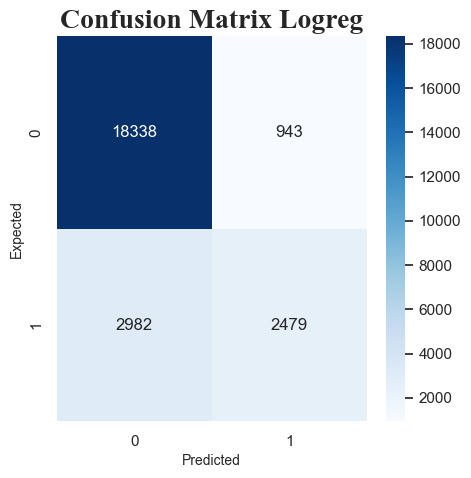

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=SEED)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print(classification_report(Y_test, Y_pred))
f1_score = classification_report(Y_test, Y_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logreg', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()


## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


F1 Score: 0.8179618438921723


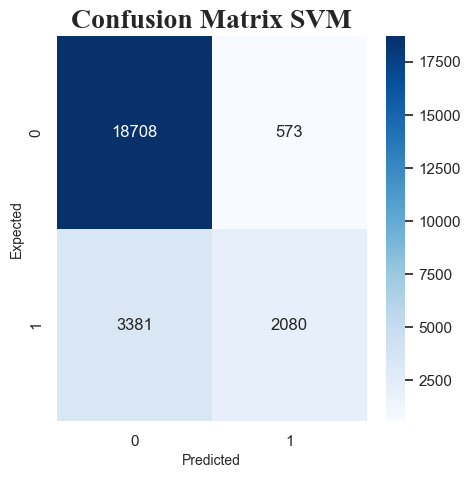

In [27]:
from sklearn.svm import SVC

svc = SVC(random_state=SEED)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
f1_score = classification_report(Y_test, Y_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1], 'gamma': [0.1, 0.01],'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(random_state=SEED), param_grid)
grid.fit(X_train,Y_train)
print(grid.best_estimator_)

grid_pred = grid.predict(X_test)
print(classification_report(Y_test, grid_pred))
f1_score = classification_report(Y_test, grid_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=grid_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=SEED)
cv_scores = cross_validate(grid, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))

# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority", random_state=SEED)
over_X_train, over_Y_train = ros.fit_resample(X_train, Y_train)
logreg = LogisticRegression(random_state=SEED)
logreg.fit(over_X_train, over_Y_train)
Y_pred = logreg.predict(X_test)
print(classification_report(Y_test, Y_pred))
f1_score = classification_report(Y_test, Y_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logreg', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not majority", random_state=SEED)
under_X_train, under_Y_train = rus.fit_resample(X_train, Y_train)
logreg = LogisticRegression(random_state=SEED)
logreg.fit(under_X_train, under_Y_train)
Y_pred = logreg.predict(X_test)
print(classification_report(Y_test, Y_pred))
f1_score = classification_report(Y_test, Y_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logreg', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()

## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

Soft voting adalah teknik mengumpulkan probabilitas prediksi dari setiap model dalam ensemble dan mengambil rata-rata dari probabilitas untuk setiap kelas sebagai prediksi akhir. Ini sering digunakan ketika model memberikan probabilitas prediksi dan tidak hanya prediksi kelas.

Hard voting adalah teknik mengumpulkan prediksi dari setiap model dalam ensemble dan mengambil mayoritas suara sebagai prediksi akhir. Misalnya, jika ada lima model dalam ensemble dan tiga model memprediksi kelas A, sedangkan dua model memprediksi kelas B, maka prediksi akhir akan menjadi kelas A karena mayoritas suara adalah kelas A.

Stacking adalah teknik ensemble learning lainnya yang lebih kompleks dan kuat. Stacking melibatkan penggunaan beberapa model yang berbeda untuk menghasilkan prediksi, tetapi bukan dengan menggunakan teknik voting sederhana seperti hard atau soft voting. Pada stacking, beberapa model (biasanya model yang berbeda-beda) digunakan untuk membuat prediksi, kemudian prediksi tersebut digunakan sebagai fitur (atau input) dalam model ensemble yang lebih besar. Ensemble model ini kemudian digunakan untuk menghasilkan prediksi akhir. Dalam pengaturan ini, model-model dasar atau base model dianggap sebagai pengklasifikasi level 0, sedangkan model ensemble dianggap sebagai pengklasifikasi level 1.

In [29]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

logreg = LogisticRegression(random_state=SEED)
svm1 = SVC(kernel="rbf", random_state=SEED)
svm2 = SVC(kernel="poly", random_state=SEED)

soft_voting = VotingClassifier(estimators=[('logreg', logreg), ('svm1', svm1), ('svm2', svm2)], voting='soft')
soft_voting.fit(X_train, Y_train)
soft_pred = soft_voting.predict(X_test)
print(classification_report(Y_test, soft_pred))
f1_score = classification_report(Y_test, soft_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=soft_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Soft Voting', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()

In [ ]:
hard_voting = VotingClassifier(estimators=[('logreg', logreg), ('svm1', svm1), ('svm2', svm2)], voting='hard')
hard_voting.fit(X_train, Y_train)
hard_pred = hard_voting.predict(X_test)
print(classification_report(Y_test, hard_pred))
f1_score = classification_report(Y_test, hard_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=hard_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Hard Voting', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()

In [ ]:
stacking = StackingClassifier(estimators=[('logreg', logreg), ('svm1', svm1), ('svm2', svm2)], final_estimator=LogisticRegression())
stacking.fit(X_train, Y_train)
stacking_pred = stacking.predict(X_test)
print(classification_report(Y_test, stacking_pred))
f1_score = classification_report(Y_test, stacking_pred, output_dict=True)['weighted avg']['f1-score']
print(f'F1 Score: {f1_score}')

# visualize confusion matrix using heatmap matplotlib
conf_mat = confusion_matrix(y_true=Y_test, y_pred=stacking_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Hard Voting', fontsize=20, fontweight='bold', fontname='Times New Roman')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Expected', fontsize=10)
plt.show()

# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)